# Analysis on Types of Accounts / Types of Influencers

Project 3 Research QUestion 1 Analysis Notebook <br>
Ashley Kang

### 1. Setting up the dataset / Creating Functions useful for our analysis

We will be using master.csv, which is a dataset that contains all the information we scraped. 

In [1]:
import json
import pandas as pd
import numpy as np

#read in the master csv file
df = pd.DataFrame(pd.read_csv("master.csv")) 



In [2]:
import math

We need to convert the format of the timestamp because we will be using the timestamp values do our analysis. 

In [3]:
#remove the "T" in the timestamp and save it into a new column
newlist = []

for row in df['video_timestamp']:
    timestamp = str(row).split('T')
    newlist.append(" ".join(timestamp))


df['video_timestamp_new'] = newlist


This is the influencer dictionary that has the different categories. We will be using this dictionary and the function influencer_type() to identify what type of influencer an author is. 

In [4]:
#dictionary with the range of followers to identify influencer type
influencerDict = {'none': range(0, 1000),
                  'nano':  range(1000,10000), 
                  'micro': range (10000,100000),
                  'macro': range(100000,1000000), 
                  'mega': range(1000000, 1000000000000000000000000000000000000000)}

influencerDict['NaN'] =  range(-1,0)

In [5]:
#function for identifying type of influencer

def influencer_type(number):
    if math.isnan(float(number)): 
        #if the number of followers is not a number (aka NaN values)
        return 'NaN'
    for category, number_range in influencerDict.items():
        if number in number_range:
            return category
    else:
        return 'unknown'

### 2. Time-Series Code

In [6]:
from collections import Counter

In [7]:
from pandas import Series
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def makeTS(filename):
    df = pd.DataFrame(pd.read_csv(filename))

    newlist = []

    for row in df['video_timestamp']:
        timestamp = str(row).split('T')
        newlist.append(" ".join(timestamp))

    df['video_timestamp_new'] = newlist

    dates = pd.to_datetime(df['video_timestamp_new'], errors = 'coerce')
    df.dropna(subset=['video_timestamp_new'], inplace=True)

    df['author_followercount'] = pd.to_numeric(df['author_followercount'], errors='coerce')
    
    df = df.iloc[:len(df['video_timestamp_new'])]

    ts = pd.Series(data=df['author_followercount'].tolist(), index=dates)
    return ts

def makeSubplot(ts,period,axs,ax,color,label):
    watches = ts.resample(period).count()
    
    if period =='W':
        time = 'week'
    elif period == 'M':
        time = 'month'
    elif period == 'D':
        time = 'day' 
        
    axs[ax].plot(watches.index,watches,color=color, label=label)
    #axs[ax].legend()
    
def makePlot(data,period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10,len(data)*2))
    
    for i in range(len(data)):
        filename = data[i]
        ts = makeTS(filename)
        color = plt.cm.viridis(i / len(data))  # Generate color based on position
        label = filename[8:-5]
        makeSubplot(ts,period,axs,i,color,label)
        axs[i].set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'))
        
    codes = [file for file in data]
    fig.legend(codes, loc='upper right')
    
    plt.tight_layout()
    plt.show()

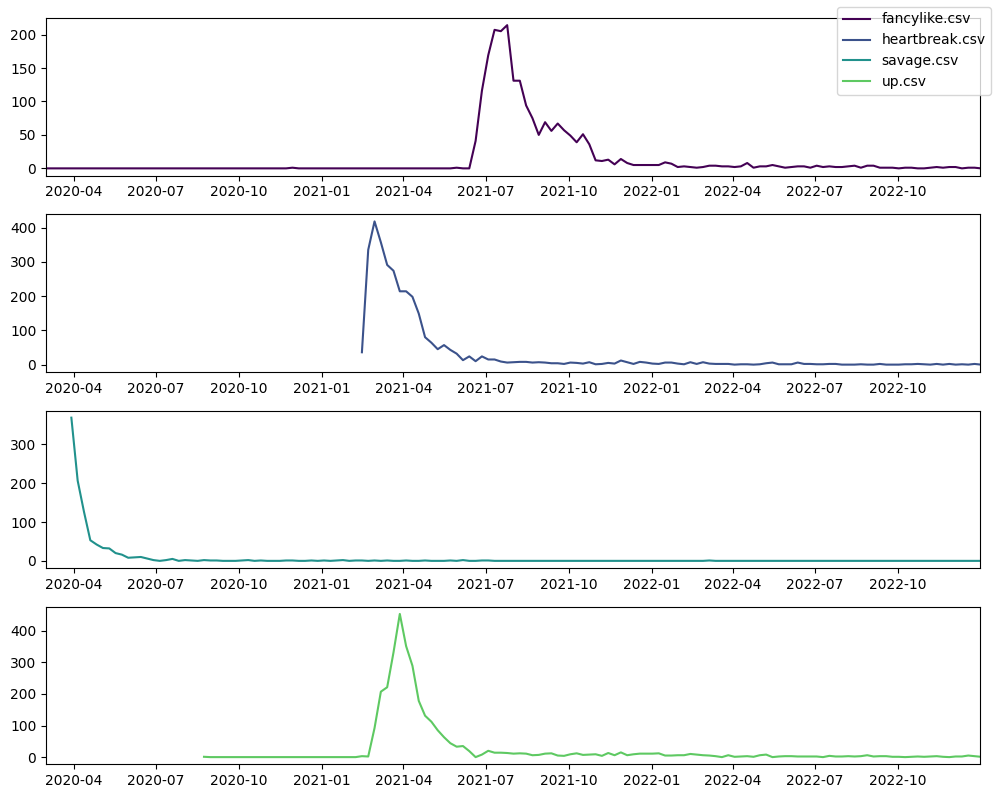

In [13]:
#2021 timeseries
data = ['fancylike.csv','heartbreak.csv','savage.csv', 'up.csv']
makePlot(data,'W')

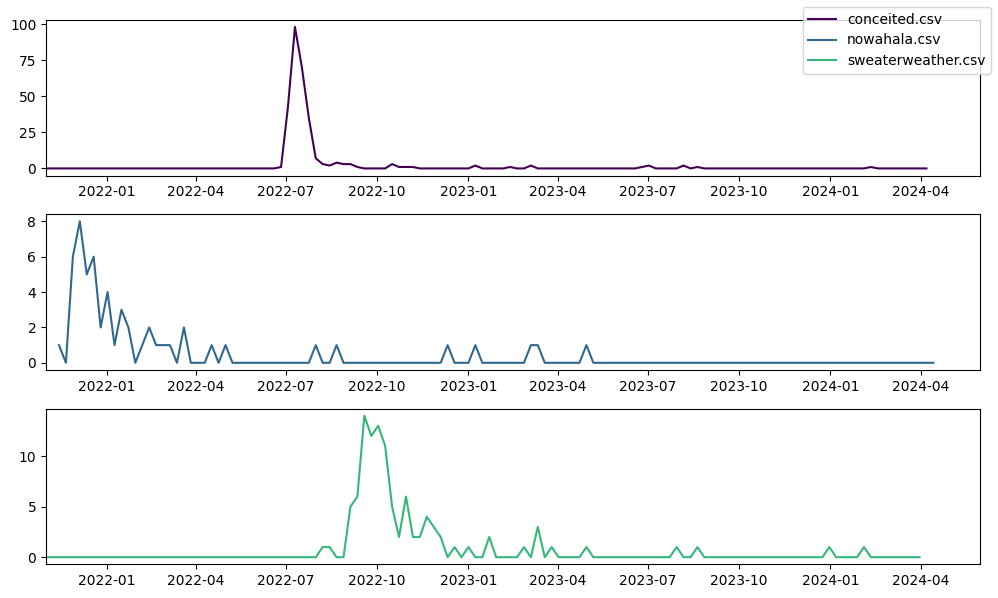

In [15]:
#2022 timeseries
def makePlot(data, period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10, len(data) * 2))
    
    for i in range(len(data)):
        filename = data[i]
        ts = makeTS(filename)
        color = plt.cm.viridis(i / len(data)) 
        label = filename
        makeSubplot(ts, period, axs, i, color, label)
        
        #axis for 2021
        #axs[i].set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'))
        
        #axis for 2022
        axs[i].set_xlim(pd.Timestamp('2021-11-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2023
        #axs[i].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2024
        #axs[i].set_xlim(pd.Timestamp('2023-08-01'), pd.Timestamp('2024-05-31'))
        
        #print("Maximum count timestamp for", label, ":", peak_timestamp)

    codes = [file for file in data]
    fig.legend(codes, loc='upper right')
        
    plt.tight_layout()
    plt.show()



#2022 time-series
#uncomment the corresponding axes from the makePlot() function
data2022 = ['conceited.csv', 'nowahala.csv', 'sweaterweather.csv']
makePlot(data2022, 'W')

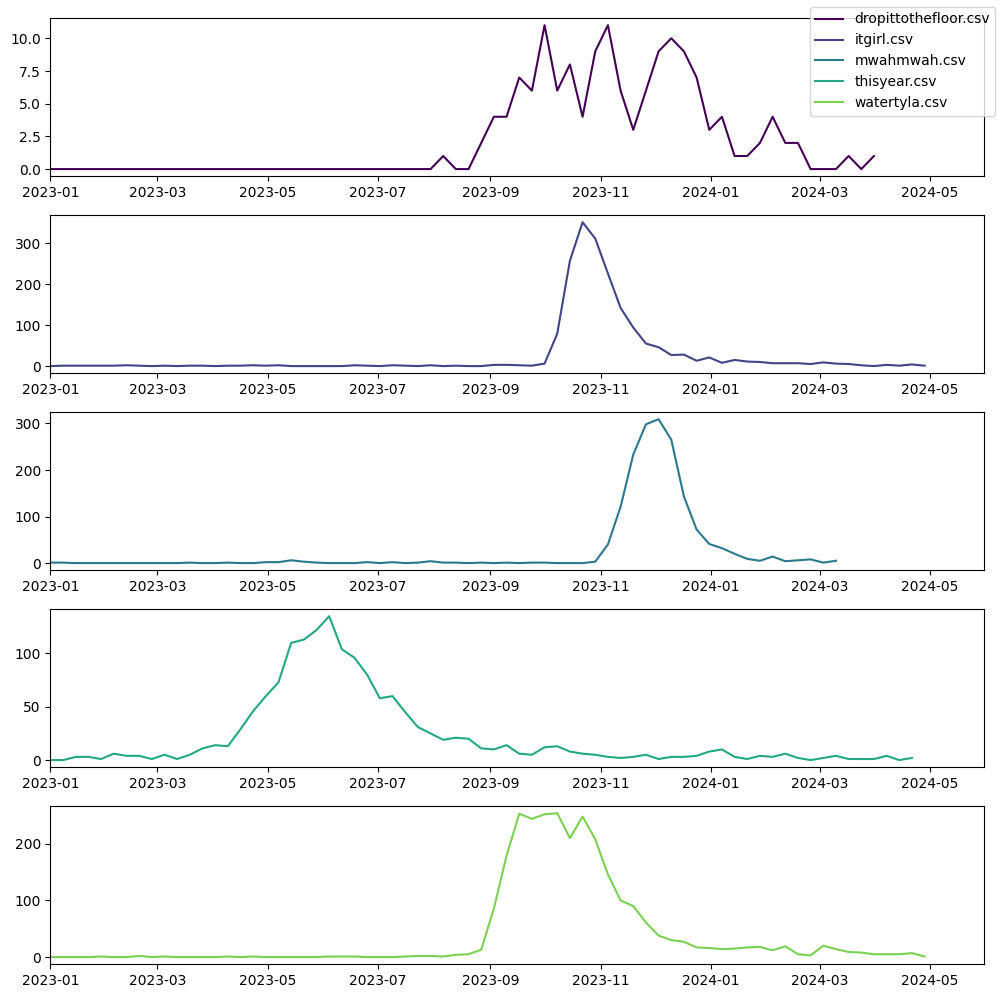

In [16]:
#2023 time-series
#uncomment the corresponding axes from the makePlot() function
def makePlot(data, period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10, len(data) * 2))
    
    for i in range(len(data)):
        filename = data[i]
        ts = makeTS(filename)
        color = plt.cm.viridis(i / len(data)) 
        label = filename
        makeSubplot(ts, period, axs, i, color, label)
        
        #axis for 2021
        #axs[i].set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'))
        
        #axis for 2022
        #axs[i].set_xlim(pd.Timestamp('2021-11-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2023
        axs[i].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2024
        #axs[i].set_xlim(pd.Timestamp('2023-08-01'), pd.Timestamp('2024-05-31'))
        
        
        #print("Maximum count timestamp for", label, ":", peak_timestamp)
    
    codes = [file for file in data]
    fig.legend(codes, loc='upper right')
    
    plt.tight_layout()
    plt.show()


data2023 = ['dropittothefloor.csv', 'itgirl.csv', 'mwahmwah.csv', 'thisyear.csv', 'watertyla.csv']
makePlot(data2023, 'W')

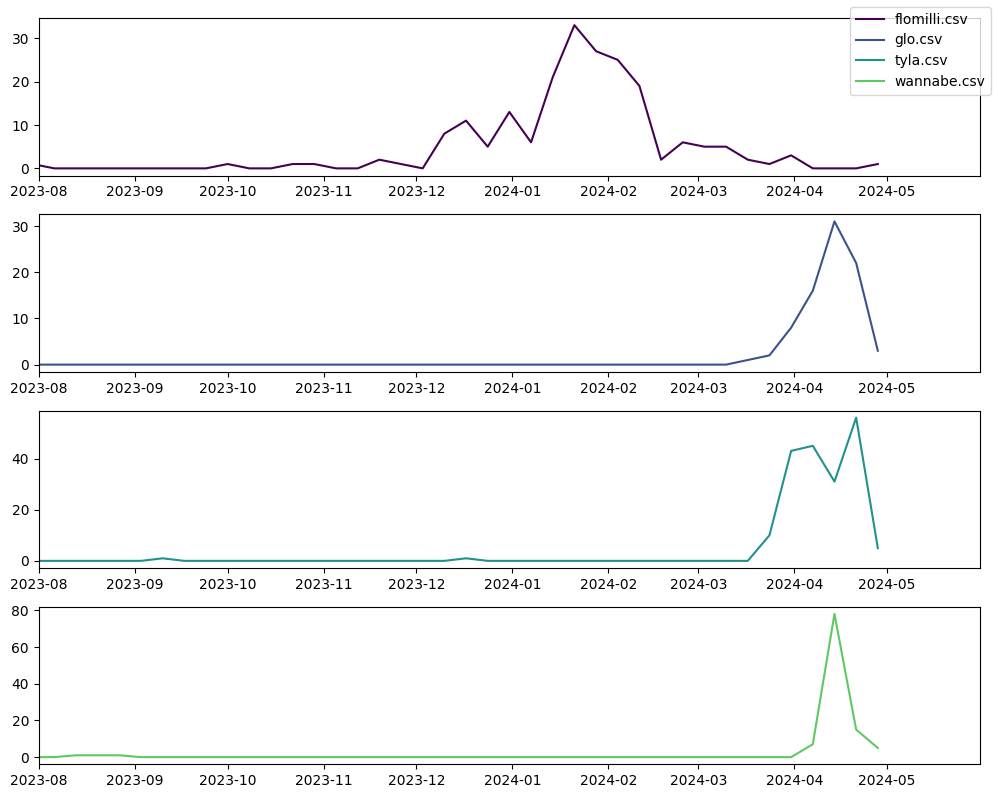

In [18]:
#2024 time-series
#uncomment the corresponding axes from the makePlot() function

def makePlot(data, period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10, len(data) * 2))
    
    for i in range(len(data)):
        filename = data[i]
        ts = makeTS(filename)
        color = plt.cm.viridis(i / len(data)) 
        label = filename
        makeSubplot(ts, period, axs, i, color, label)
        
        #axis for 2021
        #axs[i].set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'))
        
        #axis for 2022
        #axs[i].set_xlim(pd.Timestamp('2021-11-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2023
        #axs[i].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2024
        axs[i].set_xlim(pd.Timestamp('2023-08-01'), pd.Timestamp('2024-05-31'))
        
        
        #print("Maximum count timestamp for", label, ":", peak_timestamp)


    codes = [file for file in data]
    fig.legend(codes, loc='upper right')
    
    plt.tight_layout()
    plt.show()


data2024 = ['flomilli.csv', 'glo.csv', 'tyla.csv', 'wannabe.csv']
makePlot(data2024, 'W')

### Original Post Information

only available for three songs (hearbreak, drop, mwah)

In [19]:
from datetime import datetime, timedelta

In [20]:
originalVideos = ['heartbreak.csv', 'dropittothefloor.csv', 'mwahmwah.csv']
originalVid_df = pd.DataFrame()

subset_df = df[(df['sound'] == 'heartbreak') | (df['sound'] == 'dropittothefloor') | (df['sound'] == 'mwahmwah')]
subset_df['video_playcount_int'] = pd.to_numeric(subset_df['video_playcount'], errors='coerce')

originalVid_df = subset_df[(pd.notna(subset_df['video_playcount_int'])) & (subset_df['video_playcount_int'] > 100000)]


#date format so that only the year, month, and day is shown
editedDateFormat = []

# extract and add a new column
for row in originalVid_df['video_timestamp_new']:
    rowdate = str(row)[0:10]
    #rowdatefinal = pd.to_datetime(rowdate, errors='coerce').dt.date
    rowdatefinal = pd.to_datetime(rowdate, errors='coerce')
    editedDateFormat.append(rowdatefinal)
    

originalVid_df['video_timeNew'] = editedDateFormat

/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_38992/730779995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['video_playcount_int'] = pd.to_numeric(subset_df['video_playcount'], errors='coerce')
/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_38992/730779995.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  originalVid_df['video_timeNew'] = editedDateFormat


In [21]:
heartbreakDF = originalVid_df[originalVid_df['sound']=='heartbreak']
dropDF = originalVid_df[originalVid_df['sound']=='dropittothefloor']
mwahDF = originalVid_df[originalVid_df['sound']=='mwahmwah']

In [22]:
heartbreakDay1 = datetime.strptime('2021-02-10', '%Y-%m-%d')
heartbreakOriginalSubset = heartbreakDF[heartbreakDF['video_timeNew'] == heartbreakDay1]
#three videos posted on the original post day

heartbreakInfluencer = []
heartbreakFollowerCount = []

for followercount in heartbreakOriginalSubset['author_followercount']:
    heartbreakFollowerCount.append(followercount)
    heartbreakInfluencer.append(influencer_type(followercount))

#print(heartbreakOriginalSubset['video_timeNew'])
print(heartbreakFollowerCount)
counterHeartOriginal = Counter(heartbreakInfluencer)
print(counterHeartOriginal)
#all three are mega influencers


[7700000.0, 10800000.0, 3300000.0]
Counter({'mega': 3})


In [23]:
dropDay1 =  datetime.strptime('2023-08-24', '%Y-%m-%d')
dropOriginalSubset = dropDF[dropDF['video_timeNew'] == dropDay1]
#one videos posted on the original post day

dropInfluencer = []
dropFollowerCount = []

for followercount in dropOriginalSubset['author_followercount']:
    dropFollowerCount.append(followercount)
    dropInfluencer.append(influencer_type(followercount))

print(dropFollowerCount)
counterDropOriginal = Counter(dropInfluencer)
print(counterDropOriginal)
#macro influencer


[316600.0]
Counter({'macro': 1})


In [24]:
mwahDay1 = datetime.strptime('2023-04-09', '%Y-%m-%d')
mwahOriginalSubset = mwahDF[mwahDF['video_timeNew']==mwahDay1]
#one videos posted on the original post day

mwahInfluencer = []
mwahFollowerCount = []

for followercount in mwahOriginalSubset['author_followercount']:
    mwahFollowerCount.append(followercount)
    mwahInfluencer.append(influencer_type(followercount))

print(mwahFollowerCount)
counterMwahOriginal = Counter(mwahInfluencer)
print(counterMwahOriginal)
#micro influencer


[26300.0]
Counter({'micro': 1})


### Peak Post Information


available for all trends (but this section is for the three songs with the original post)

In [31]:
heartbreakmaxdate = max(Counter(heartbreakDF['video_timeNew']), key = Counter(heartbreakDF['video_timeNew']).get)
stringdateHB = str(heartbreakmaxdate)[0:10]
heartbreakmaxdateConverted = datetime.strptime(stringdateHB, '%Y-%m-%d')
hearbreakFinalDate = heartbreakmaxdateConverted.date()

heartbreakcounter = (Counter(heartbreakDF['video_timeNew']))
heartbreakmaxvideoValue = heartbreakcounter[heartbreakmaxdate]

print(hearbreakFinalDate)
print(heartbreakmaxvideoValue)


2021-02-21
74


In [26]:
heartbreakPeak = datetime.strptime('2021-02-21', '%Y-%m-%d')
heartbreakPeakSubset = heartbreakDF[heartbreakDF['video_timeNew'] == heartbreakPeak]
#74 videos posted on the peak

heartbreakInfluencerPEAK = []
heartbreakFollowerCountPEAK = []

for followercount in heartbreakPeakSubset['author_followercount']:
    heartbreakFollowerCountPEAK.append(followercount)
    heartbreakInfluencerPEAK.append(influencer_type(followercount))


print(heartbreakFollowerCountPEAK)
counterHeartPeak = Counter(heartbreakInfluencerPEAK)
print(counterHeartPeak)



[4140.0, 17500.0, 196500.0, 3000000.0, 2440.0, 2300000.0, 1600000.0, 4613.0, 13300000.0, 81500.0, 963.0, 2400000.0, 40500.0, 37800.0, 111000.0, 938800.0, 3000000.0, 32200.0, 991.0, 834300.0, 20000.0, 12000.0, 1600000.0, 2600000.0, 2400000.0, 2600000.0, 42900.0, 1100000.0, 122500.0, 460400.0, 324200.0, 240700.0, 112200.0, 64599.0, 3891.0, 4099999.0, 3100000.0, 1799.0, 339500.0, 121000.0, 17600.0, 563100.0, 2400000.0, 1500000.0, 40300.0, 494800.0, 133800.0, 668.0, 784200.0, 1700000.0, 1700000.0, 2976.0, 81300.0, 22700000.0, 3000000.0, 146400.0, 749100.0, 56200.0, 23400.0, 98000.0, 750000.0, 4611.0, 1621.0, 1022.0, 5400000.0, 9951.0, 1200000.0, 11700000.0, 8100000.0, 5441.0, 10800.0, 1790.0, 4741.0, 2700000.0]
Counter({'mega': 24, 'macro': 18, 'micro': 16, 'nano': 13, 'none': 3})


In [32]:
dropmaxdate = max(Counter(dropDF['video_timeNew']), key = Counter(dropDF['video_timeNew']).get)
stringdateDROP = str(dropmaxdate)[0:10]
dropmaxdateConverted = datetime.strptime(stringdateDROP, '%Y-%m-%d')
dropFinalDate = dropmaxdateConverted.date()

dropcounter = (Counter(dropDF['video_timeNew']))
dropmaxvideoValue = dropcounter[dropmaxdate]
#dropmaxdate = dropmaxdate.date()

print(dropFinalDate)
print(dropmaxvideoValue)

2023-12-10
4


In [33]:
dropPeak = datetime.strptime('2023-12-10', '%Y-%m-%d')
dropPeakSubset = dropDF[dropDF['video_timeNew'] == dropPeak]
#four videos posted at peak

dropInfluencerPEAK = []
dropFollowerCountPEAK = []

for followercount in dropPeakSubset['author_followercount']:
    dropFollowerCountPEAK.append(followercount)
    dropInfluencerPEAK.append(influencer_type(followercount))

print(dropFollowerCountPEAK)
counterDropPeak = Counter(dropInfluencerPEAK)
print(counterDropPeak)


[26300.0, 2040.0, 173800.0, 725300.0]
Counter({'macro': 2, 'micro': 1, 'nano': 1})


In [34]:
mwahmaxdate = max(Counter(mwahDF['video_timeNew']), key = Counter(mwahDF['video_timeNew']).get)
stringdateMWAH = str(mwahmaxdate)[0:10]
mwahmaxdateConverted = datetime.strptime(stringdateMWAH, '%Y-%m-%d')
mwahFinalDate = mwahmaxdateConverted.date()


mwahcounter = (Counter(mwahDF['video_timeNew']))
mwahmaxvideoValue = mwahcounter[mwahmaxdate]



print(mwahFinalDate)
print(mwahmaxvideoValue)

2023-11-22
51


In [35]:
mwahmwahPeak = datetime.strptime('2023-11-22', '%Y-%m-%d')
mwahmwahPeakSubset = mwahDF[mwahDF['video_timeNew'] == mwahmwahPeak]


mwahInfluencerPEAK = []
mwahFollowerCountPEAK = []

for followercount in mwahmwahPeakSubset['author_followercount']:
    mwahFollowerCountPEAK.append(followercount)
    mwahInfluencerPEAK.append(influencer_type(followercount))

print(mwahFollowerCountPEAK)
counterMwahPeak = Counter(mwahInfluencerPEAK)
print(counterMwahPeak)

[6863.0, 164800.0, 498500.0, 1400000.0, 10500000.0, 410400.0, 2200000.0, 1450.0, 60200.0, 19900000.0, 209000.0, 74700.0, 22300000.0, 3800000.0, 2600000.0, 920300.0, 484100.0, nan, 26000000.0, 2200000.0, 781800.0, 338300.0, 2300000.0, 3000000.0, 652400.0, 2400000.0, 103600.0, 14500000.0, 4300000.0, 78600.0, 489000.0, 4095.0, 7500000.0, 5600000.0, 215700.0, 19400000.0, 75400.0, 722700.0, 6000000.0, 1100000.0, 4500000.0, 9700000.0, 30500.0, 147800.0, 255700.0, 180400.0, 2800000.0, 86300.0, 516.0, 758.0, 154400.0]
Counter({'mega': 22, 'macro': 17, 'micro': 6, 'nano': 3, 'none': 2, 'NaN': 1})


### Middle Post Information


available for all trends (but this section is for the three songs with the original post)

In [36]:
from datetime import datetime

In [37]:
heartbreak_middate = heartbreakDay1.date() + (hearbreakFinalDate - heartbreakDay1.date()) / 2

drop_middate = dropDay1.date() + (dropFinalDate - dropDay1.date()) / 2

mwah_middate = mwahDay1.date() + (mwahFinalDate - mwahDay1.date()) / 2

In [38]:
print(heartbreak_middate)
print(drop_middate)
print(mwah_middate)

2021-02-15
2023-10-17
2023-07-31


In [39]:
heartbreakMiddleDate = datetime.strptime('2021-02-15', '%Y-%m-%d')
heartbreakMidSubset = heartbreakDF[heartbreakDF['video_timeNew']==heartbreakMiddleDate]
#13 videos posted on this day

heartbreakInfluencerMID = []
heartbreakFollowerCountMID = []

for followercount in heartbreakMidSubset['author_followercount']:
    heartbreakFollowerCountMID.append(followercount)
    heartbreakInfluencerMID.append(influencer_type(followercount))

print(heartbreakFollowerCountMID)
counterHeartMiddle = Counter(heartbreakInfluencerMID)
print(counterHeartMiddle)



[16900.0, 113200.0, 13200000.0, 13200000.0, 359300.0, 3400000.0, 3200000.0, 14400.0, 17000000.0, 9500000.0, 863000.0, 11700000.0, 13.0]
Counter({'mega': 7, 'macro': 3, 'micro': 2, 'none': 1})


In [40]:
dropMiddleDate =  datetime.strptime('2023-10-10', '%Y-%m-%d')
dropMidSubset = dropDF[dropDF['video_timeNew'] == dropMiddleDate]
#three videos posted on this day (had to change the date because no videos were posted on the mid date)

dropInfluencerMID = []
dropFollowerCountMID = []

for followercount in dropMidSubset['author_followercount']:
    dropFollowerCountMID.append(followercount)
    dropInfluencerMID.append(influencer_type(followercount))

print(dropFollowerCountMID)
counterDropMiddle = Counter(dropInfluencerMID)
print(counterDropMiddle)

[422900.0, 7900000.0, 6907.0]
Counter({'macro': 1, 'mega': 1, 'nano': 1})


In [41]:
mwahMiddleDate = datetime.strptime('2023-07-24', '%Y-%m-%d')
mwahMiddleSubset = mwahDF[mwahDF['video_timeNew']==mwahMiddleDate]
#two videos posted on this day (also had to change the date because no videos were posted)

mwahInfluencerMID = []
mwahFollowerCountMID = []

for followercount in mwahMiddleSubset['author_followercount']:
    mwahFollowerCountMID.append(followercount)
    mwahInfluencerMID.append(influencer_type(followercount))

print(mwahFollowerCountMID)
counterMwahMiddle = Counter(mwahInfluencerMID)
print(counterMwahMiddle)
#both mega influencers


[4900000.0, 3200000.0]
Counter({'mega': 2})


### Convert Counters to Lists and Values and Plot

focusing on the three trends with the original posts

In [47]:
def convertToList(category_counts):
    categories = influencerDict.keys()

    category_list = [0] * len(categories)

    #convert counter format into list
    for i, category in enumerate(categories):
        category_list[i] = category_counts.get(category, 0)
    
    return category_list


In [48]:
VideosWithOriginalList = [counterHeartOriginal, counterHeartMiddle, counterHeartPeak, 
             counterDropOriginal, counterDropMiddle, counterDropPeak, 
             counterMwahOriginal, counterMwahMiddle, counterMwahPeak]


CounterList = []
for list in VideosWithOriginalList:
    CounterList.append(convertToList(list))


heartbreakList = CounterList[0:3]
dropList = CounterList[3: 6]
mwahList = CounterList[6: 9]

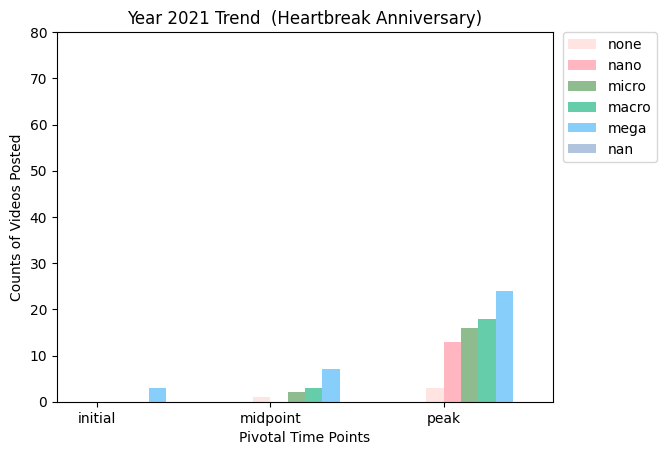

In [54]:
labels = ['initial', 'midpoint', 'peak']

none = []
nano = []
micro = []
macro = []
mega = []
nan = []

#assign the values to the tier lists
for inner_list in heartbreakList:
    none.append(inner_list[0])
    nano.append(inner_list[1])
    micro.append(inner_list[2])
    macro.append(inner_list[3])
    mega.append(inner_list[4])
    nan.append(inner_list[5])
        

#width of the bars
bar_width = 0.1
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

#set colors
color = ['mistyrose', 'lightpink', 'darkseagreen', 'mediumaquamarine', 'lightskyblue', 'lightsteelblue']

#plot
plt.bar(r1, none, color=color[0], width=bar_width, label='none')
plt.bar(r2, nano, color=color[1], width=bar_width, label='nano')
plt.bar(r3, micro, color=color[2], width=bar_width, label='micro')
plt.bar(r4, macro, color=color[3], width=bar_width, label='macro')
plt.bar(r5, mega, color=color[4], width=bar_width, label='mega')
plt.bar(r6, nan, color=color[5], width=bar_width, label='nan')

#labels
plt.xlabel('Pivotal Time Points')
plt.ylabel('Counts of Videos Posted')
plt.title('Year 2021 Trend  (Heartbreak Anniversary)')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.ylim(0, 80)

#legend on the upper left
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#plot
plt.show()

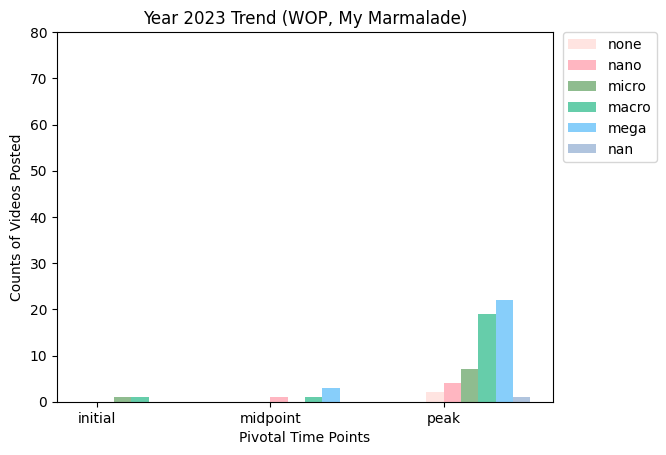

In [57]:
labels = ['initial', 'midpoint', 'peak']

none = []
nano = []
micro = []
macro = []
mega = []
nan = []

#add the lists together
addedList = []

for list1, list2 in zip(dropList, mwahList):
    result = []
    for x, y in zip(list1, list2):
        result.append(x + y)
    addedList.append(result)


#assign the values to the tier lists
for inner_list1 in addedList:
    none.append(inner_list1[0])
    nano.append(inner_list1[1])
    micro.append(inner_list1[2])
    macro.append(inner_list1[3])
    mega.append(inner_list1[4])
    nan.append(inner_list1[5])


#width of the bars
bar_width = 0.1
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

color = ['mistyrose', 'lightpink', 'darkseagreen', 'mediumaquamarine', 'lightskyblue', 'lightsteelblue']

#plot
plt.bar(r1, none, color=color[0], width=bar_width, label='none')
plt.bar(r2, nano, color=color[1], width=bar_width, label='nano')
plt.bar(r3, micro, color=color[2], width=bar_width, label='micro')
plt.bar(r4, macro, color=color[3], width=bar_width, label='macro')
plt.bar(r5, mega, color=color[4], width=bar_width, label='mega')
plt.bar(r6, nan, color=color[5], width=bar_width, label='nan')

#labels
plt.xlabel('Pivotal Time Points')
plt.ylabel('Counts of Videos Posted')
plt.title('Year 2023 Trend (WOP, My Marmalade)')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.yticks()
plt.ylim(0, 80)

#legend on the upper left
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


#plot
plt.show()

### Analysis for other songs that don't have the original video labeled

year 2021

In [60]:
videos2021 = ['fancylike.csv', 'heartbreak.csv', 'savage.csv', 'up.csv']
df2021 = pd.DataFrame()

subset_df2021 = df[(df['sound'] == 'fancylike') | (df['sound'] == 'heartbreak') | (df['sound'] == 'savage') | (df['sound'] == 'up')]
subset_df2021['video_playcount_int'] = pd.to_numeric(subset_df2021['video_playcount'], errors='coerce')

#subset so that we are focusing on videos with more than 100K views (videos that gained relatively more attention)
df2021 = subset_df2021[(pd.notna(subset_df2021['video_playcount_int'])) & (subset_df2021['video_playcount_int'] > 100000)]

#date format so that only the year, month, and day are shown
editedDateFormat = []

#extract and add a new column
for row in df2021['video_timestamp_new']:
    rowdate = str(row)[0:10]
    #rowdatefinal = pd.to_datetime(rowdate, errors='coerce').dt.date
    rowdatefinal = pd.to_datetime(rowdate, errors='coerce')
    editedDateFormat.append(rowdatefinal)
    

df2021['video_timeNew'] = editedDateFormat

/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_38992/535456585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df2021['video_playcount_int'] = pd.to_numeric(subset_df2021['video_playcount'], errors='coerce')


/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_38992/535456585.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021['video_timeNew'] = editedDateFormat


In [61]:
fancyDF = df2021[df2021['sound']=='fancylike']
savageDF = df2021[df2021['sound']=='savage']
upDF = df2021[df2021['sound']=='up']

In [62]:
fancymaxdate = max(Counter(fancyDF['video_timeNew']), key = Counter(fancyDF['video_timeNew']).get)
stringdateFancy = str(fancymaxdate)[0:10]
fancymaxdateConverted = datetime.strptime(stringdateFancy, '%Y-%m-%d')
fancyFinalDate = fancymaxdateConverted.date()

fancycounter = (Counter(fancyDF['video_timeNew']))
fancymaxvideoValue = fancycounter[fancymaxdate]
print(fancyFinalDate)
print(fancymaxvideoValue)


fancyPeak = datetime.strptime('2021-07-07', '%Y-%m-%d')
fancyPeakSubset = fancyDF[fancyDF['video_timeNew'] == fancyPeak]
#41 videos posted on the peak

fancyInfluencerPEAK = []
fancyFollowerCountPEAK = []

for followercount in fancyPeakSubset['author_followercount']:
    fancyFollowerCountPEAK.append(followercount)
    fancyInfluencerPEAK.append(influencer_type(followercount))


print(fancyFollowerCountPEAK)
counterFancyPeak = Counter(fancyInfluencerPEAK)
print(counterFancyPeak)

2021-07-07
41
[14000.0, 2700000.0, 20400.0, 1200000.0, 531400.0, 108400.0, 25400.0, 3300000.0, 535800.0, 114100.0, 527100.0, 12700.0, 969200.0, 3286.0, 4800000.0, 13200.0, 2123.0, 2200000.0, 167500.0, 221400.0, 26900.0, 311500.0, 19200.0, 275700.0, 19000.0, 11800.0, 3200000.0, 35300.0, 47300.0, 7495.0, 10500.0, 416600.0, 1900000.0, 2600000.0, 25500.0, 922800.0, 1800000.0, 7787.0, 74400.0, 72000.0, 801300.0]
Counter({'micro': 15, 'macro': 13, 'mega': 9, 'nano': 4})


In [63]:
savagemaxdate = max(Counter(savageDF['video_timeNew']), key = Counter(savageDF['video_timeNew']).get)
stringdateSavage = str(savagemaxdate)[0:10]
savagemaxdateConverted = datetime.strptime(stringdateSavage, '%Y-%m-%d')
savageFinalDate = savagemaxdateConverted.date()

savagecounter = (Counter(savageDF['video_timeNew']))
savagemaxvideoValue = savagecounter[savagemaxdate]
print(savageFinalDate)
print(savagemaxvideoValue)


savagePeak = datetime.strptime('2020-03-28', '%Y-%m-%d')
savagePeakSubset = savageDF[savageDF['video_timeNew'] == savagePeak]
#32 videos posted on the peak

savageInfluencerPEAK = []
savageFollowerCountPEAK = []

for followercount in savagePeakSubset['author_followercount']:
    savageFollowerCountPEAK.append(followercount)
    savageInfluencerPEAK.append(influencer_type(followercount))


print(savageFollowerCountPEAK)
counterSavagePeak = Counter(savageInfluencerPEAK)
print(counterSavagePeak)

2020-03-28
32
[1100000.0, 349200.0, 7400000.0, 1800000.0, 3500000.0, 883200.0, 43200000.0, 2300000.0, 9500000.0, 6900000.0, 2300000.0, 349800.0, 1500000.0, 678800.0, 18200000.0, 8100000.0, 494900.0, 1100000.0, 889500.0, 947100.0, 2700000.0, 1200000.0, 211100.0, 20200000.0, 20200000.0, 6900000.0, 1100000.0, 142900.0, 624300.0, 2181.0, 397800.0, 3900000.0]
Counter({'mega': 20, 'macro': 11, 'nano': 1})


In [64]:
upmaxdate = max(Counter(upDF['video_timeNew']), key = Counter(upDF['video_timeNew']).get)
stringdateUp = str(upmaxdate)[0:10]
upmaxdateConverted = datetime.strptime(stringdateUp, '%Y-%m-%d')
upFinalDate = upmaxdateConverted.date()

upcounter = (Counter(upDF['video_timeNew']))
upmaxvideoValue = upcounter[upmaxdate]
print(upFinalDate)
print(upmaxvideoValue)


upPeak = datetime.strptime('2021-03-25', '%Y-%m-%d')
upPeakSubset = upDF[upDF['video_timeNew'] == upPeak]
#59 videos posted on the peak

upInfluencerPEAK = []
upFollowerCountPEAK = []

for followercount in upPeakSubset['author_followercount']:
    upFollowerCountPEAK.append(followercount)
    upInfluencerPEAK.append(influencer_type(followercount))

print(upFollowerCountPEAK)
counterUpPeak = Counter(upInfluencerPEAK)
print(counterUpPeak)

2021-03-25
59
[3369.0, 2900000.0, 71000.0, 10300000.0, 3600000.0, 178100.0, 151200.0, 1400000.0, 30400000.0, 647300.0, 16399999.0, 506100.0, 871300.0, 5000000.0, 1300000.0, 6980.0, 932000.0, 5300000.0, 415800.0, 3700000.0, 250600.0, 468400.0, 202400.0, 2400000.0, 3800000.0, 996000.0, 6800000.0, 250500.0, 754500.0, 1444.0, 4800000.0, 4500000.0, 1300000.0, 17800.0, 15800000.0, 635200.0, 921500.0, 64000.0, 402100.0, 488400.0, 3400000.0, 310100.0, 329000.0, 219700.0, 32800.0, 323200.0, 4800000.0, 2800000.0, 2800000.0, 1100000.0, 24000.0, 31100000.0, 2400000.0, 283.0, 105700.0, 582000.0, 2300000.0, 17000.0, 978400.0]
Counter({'mega': 25, 'macro': 24, 'micro': 6, 'nano': 3, 'none': 1})


In [65]:
#identify the first day of the initial point from the time series

fancyDay1 = datetime.strptime('2021-06-14', '%Y-%m-%d')
savageDay1 = datetime.strptime('2020-03-23', '%Y-%m-%d')
upDay1 = datetime.strptime('2021-02-12', '%Y-%m-%d')


fancy_middate = fancyDay1.date() + (fancyFinalDate - fancyDay1.date()) / 2

savage_middate = savageDay1.date() + (savageFinalDate - savageDay1.date()) / 2

up_middate = upDay1.date() + (upFinalDate - upDay1.date()) / 2


print(fancy_middate)
print(savage_middate)
print(up_middate)


2021-06-25
2020-03-25
2021-03-04


In [66]:
fancyMiddleDate = datetime.strptime('2021-06-25', '%Y-%m-%d')
fancyMidSubset = fancyDF[fancyDF['video_timeNew']==fancyMiddleDate]
print(fancyMidSubset)
#16 authors

fancyInfluencerMID = []
fancyFollowerCountMID = []

for followercount in fancyMidSubset['author_followercount']:
    fancyFollowerCountMID.append(followercount)
    fancyInfluencerMID.append(influencer_type(followercount))

print(fancyFollowerCountMID)
counterFancyMiddle = Counter(fancyInfluencerMID)
print(counterFancyMiddle)

           sound  year             video_id      video_timestamp  \
1698   fancylike  2021  6977857792937921797  2021-06-25T18:12:05   
1902   fancylike  2021  6977936959612259589  2021-06-25T23:19:19   
5331   fancylike  2021  6977891041257065733  2021-06-25T20:21:07   
5886   fancylike  2021  6977796516857646341  2021-06-25T14:14:17   
7190   fancylike  2021  6977653802635693318  2021-06-25T05:00:35   
8599   fancylike  2021  6977876547285945605  2021-06-25T19:24:52   
10406  fancylike  2021  6977730307373944069  2021-06-25T09:57:23   
12960  fancylike  2021  6977850339118648582  2021-06-25T17:43:09   
13374  fancylike  2021  6977621515017800965  2021-06-25T02:55:19   
18007  fancylike  2021  6977811966224125190  2021-06-25T15:14:15   
19213  fancylike  2021  6977862479506394374  2021-06-25T18:30:16   
21326  fancylike  2021  6977815832600513797  2021-06-25T15:29:14   
21948  fancylike  2021  6977836729092918534  2021-06-25T16:50:20   
23347  fancylike  2021  6977919541305249030  202

In [67]:
savageMiddleDate = datetime.strptime('2020-03-25', '%Y-%m-%d')
savageMidSubset = savageDF[savageDF['video_timeNew']==savageMiddleDate]
#print(savageMidSubset)
#11 authors

savageInfluencerMID = []
savageFollowerCountMID = []

for followercount in savageMidSubset['author_followercount']:
    savageFollowerCountMID.append(followercount)
    savageInfluencerMID.append(influencer_type(followercount))

print(savageFollowerCountMID)
counterSavageMiddle = Counter(savageInfluencerMID)
print(counterSavageMiddle)

[2300000.0, 16400.0, 4600000.0, 237600.0, 11500000.0, 3700000.0, 718200.0, 5300000.0, 8300000.0, 105200.0, 6700000.0]
Counter({'mega': 7, 'macro': 3, 'micro': 1})


In [68]:
upMiddleDate = datetime.strptime('2021-03-04', '%Y-%m-%d')
upMidSubset = upDF[upDF['video_timeNew']==upMiddleDate]
#25 authors

upInfluencerMID = []
upFollowerCountMID = []

for followercount in upMidSubset['author_followercount']:
    upFollowerCountMID.append(followercount)
    upInfluencerMID.append(influencer_type(followercount))

print(upFollowerCountMID)
counterUpMiddle = Counter(upInfluencerMID)
print(counterUpMiddle)


[18700.0, 1300000.0, 97400.0, 4099999.0, 621800.0, 3100000.0, 401900.0, 7400000.0, 985700.0, 1200000.0, 171300.0, 348700.0, 1300000.0, 1300000.0, 134700.0, 1200000.0, 1400000.0, 777200.0, 131100.0, 387300.0, 3900000.0, 107600.0, 34500.0, 937400.0, 10500000.0]
Counter({'mega': 11, 'macro': 11, 'micro': 3})


In [69]:
AllLists2021 = [counterFancyMiddle, counterFancyPeak, 
                counterHeartMiddle, counterHeartPeak, 
                counterSavageMiddle, counterSavagePeak, 
                counterUpMiddle, counterUpPeak]

CounterList2021 = []
for list in AllLists2021:
    CounterList2021.append(convertToList(list))

fancyList = CounterList2021[0:2]
heartList = heartbreakList[1:3]
savageList = CounterList2021[4: 6]
upList = CounterList2021[6: 8]


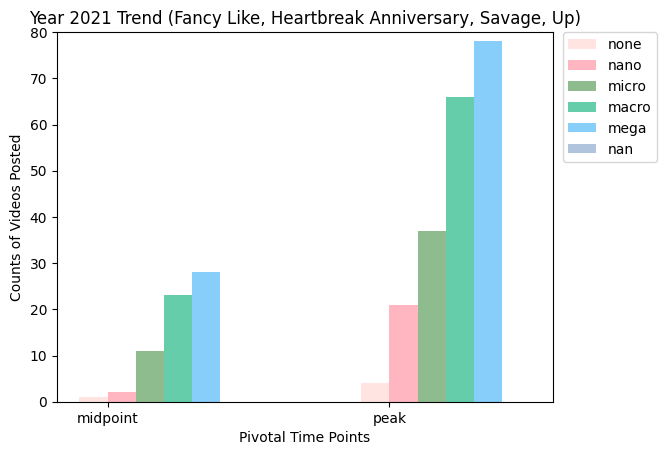

In [72]:
labels = ['midpoint', 'peak']

none = []
nano = []
micro = []
macro = []
mega = []
nan = []


addedList = []
for list1, list2, list3, list4 in zip(fancyList, heartList, savageList, upList):
    result = []
    for x, y, z, w in zip(list1, list2, list3, list4):
        result.append(x + y + z + w)
    addedList.append(result)


for inner_list1 in addedList:
    none.append(inner_list1[0])
    nano.append(inner_list1[1])
    micro.append(inner_list1[2])
    macro.append(inner_list1[3])
    mega.append(inner_list1[4])
    nan.append(inner_list1[5])


#width
bar_width = 0.1
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

color = ['mistyrose', 'lightpink', 'darkseagreen', 'mediumaquamarine', 'lightskyblue', 'lightsteelblue']

#plot
plt.bar(r1, none, color=color[0], width=bar_width, label='none')
plt.bar(r2, nano, color=color[1], width=bar_width, label='nano')
plt.bar(r3, micro, color=color[2], width=bar_width, label='micro')
plt.bar(r4, macro, color=color[3], width=bar_width, label='macro')
plt.bar(r5, mega, color=color[4], width=bar_width, label='mega')
plt.bar(r6, nan, color=color[5], width=bar_width, label='nan')

#labels
plt.xlabel('Pivotal Time Points')
plt.ylabel('Counts of Videos Posted')
plt.title('Year 2021 Trend (Fancy Like, Heartbreak Anniversary, Savage, Up)')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.yticks()

#legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim(0, 80)

#plot
plt.show()

In [75]:
#count for total posts posted by high tier influencers at the mid point
print(macro[0] + mega[0])
print(macro[0])
print(mega[0])
#total 51, 23 macro, 28 mega

#count for total posts posted at the peak
print(none[1] + nano[1] + micro[1] + macro[1] + mega[1] + nan[1])
#total 206

51
23
28
206


### Analysis for other songs that don't have the original video labeled

year 2022

In [76]:
videos2022 = ['conceited.csv', 'nowahala.csv', 'sweaterweather.csv']
df2022 = pd.DataFrame()

subset_df2022 = df[(df['sound'] == 'conceited') | (df['sound'] == 'nowahala') | (df['sound'] == 'sweaterweather')]
subset_df2022['video_playcount_int'] = pd.to_numeric(subset_df2022['video_playcount'], errors='coerce')

df2022 = subset_df2022[(pd.notna(subset_df2022['video_playcount_int'])) & (subset_df2022['video_playcount_int'] > 100000)]


#date format so that only the year, month, and day is shown
editedDateFormat = []

#extract and add a new column
for row in df2022['video_timestamp_new']:
    rowdate = str(row)[0:10]
    rowdatefinal = pd.to_datetime(rowdate, errors='coerce')
    editedDateFormat.append(rowdatefinal)
    

df2022['video_timeNew'] = editedDateFormat

/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_38992/3326276472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df2022['video_playcount_int'] = pd.to_numeric(subset_df2022['video_playcount'], errors='coerce')
/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_38992/3326276472.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022['video_timeNew'] = editedDateFormat


In [77]:
conceitedDF = df2022[df2022['sound']=='conceited']
nowahalaDF = df2022[df2022['sound']=='nowahala']
weatherDF = df2022[df2022['sound']=='sweaterweather']

In [78]:
conceitedmaxdate = max(Counter(conceitedDF['video_timeNew']), key = Counter(conceitedDF['video_timeNew']).get)
stringdateConceited = str(conceitedmaxdate)[0:10]
conceitedmaxdateConverted = datetime.strptime(stringdateConceited, '%Y-%m-%d')
conceitedFinalDate = conceitedmaxdateConverted.date()

conceitedcounter = (Counter(conceitedDF['video_timeNew']))
conceitedmaxvideoValue = conceitedcounter[conceitedmaxdate]
print(conceitedFinalDate)
print(conceitedmaxvideoValue)


conceitedPeak = datetime.strptime('2022-07-07', '%Y-%m-%d')
conceitedPeakSubset = conceitedDF[conceitedDF['video_timeNew'] == conceitedPeak]
#77 videos posted on the peak

conceitedInfluencerPEAK = []
conceitedFollowerCountPEAK = []

for followercount in conceitedPeakSubset['author_followercount']:
    conceitedFollowerCountPEAK.append(followercount)
    conceitedInfluencerPEAK.append(influencer_type(followercount))

print(conceitedFollowerCountPEAK)
counterConceitedPeak = Counter(conceitedInfluencerPEAK)
print(counterConceitedPeak)

2022-07-07
77
[nan, 2700000.0, nan, 5600000.0, nan, nan, nan, nan, 3400000.0, nan, nan, nan, nan, 458700.0, nan, 7700000.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 342600.0, nan, nan, nan, nan, nan, 171300.0, nan, nan, nan, nan, 3700000.0, nan, nan, nan, nan, nan, nan, 264600.0, nan, nan, nan, 1300000.0, nan, nan, nan, nan, 792400.0, nan, nan, nan, nan, nan, nan, 937400.0, nan, nan, nan, nan, nan, nan, 778800.0, 564200.0, nan, nan, 6600000.0, nan, 1300000.0, nan, nan]
Counter({'NaN': 61, 'mega': 8, 'macro': 8})


In [80]:
nowahalamaxdate = max(Counter(nowahalaDF['video_timeNew']), key = Counter(nowahalaDF['video_timeNew']).get)
stringdateNowahala = str(nowahalamaxdate)[0:10]
nowahalamaxdateConverted = datetime.strptime(stringdateNowahala, '%Y-%m-%d')
nowahalaFinalDate = nowahalamaxdateConverted.date()

nowahalacounter = (Counter(nowahalaDF['video_timeNew']))
nowahalamaxvideoValue = nowahalacounter[nowahalamaxdate]
print(nowahalaFinalDate)
print(nowahalamaxvideoValue)


nowahalaPeak = datetime.strptime('2021-11-29', '%Y-%m-%d')
nowahalaPeakSubset = nowahalaDF[nowahalaDF['video_timeNew'] == nowahalaPeak]
#6 videos posted on the peak

nowahalaInfluencerPEAK = []
nowahalaFollowerCountPEAK = []

for followercount in nowahalaPeakSubset['author_followercount']:
    nowahalaFollowerCountPEAK.append(followercount)
    nowahalaInfluencerPEAK.append(influencer_type(followercount))

print(nowahalaFollowerCountPEAK)
counterNowahalaPeak = Counter(nowahalaInfluencerPEAK)
print(counterNowahalaPeak)

2021-11-29
6
[nan, 3700000.0, 2200000.0, 1842.0, nan, nan]
Counter({'NaN': 3, 'mega': 2, 'nano': 1})


In [81]:
weathermaxdate = max(Counter(weatherDF['video_timeNew']), key = Counter(weatherDF['video_timeNew']).get)
stringdateWeather = str(weathermaxdate)[0:10]
weathermaxdateConverted = datetime.strptime(stringdateWeather, '%Y-%m-%d')
weatherFinalDate = weathermaxdateConverted.date()

weathercounter = (Counter(weatherDF['video_timeNew']))
weathermaxvideoValue = weathercounter[weathermaxdate]
print(weatherFinalDate)
print(weathermaxvideoValue)


weatherPeak = datetime.strptime('2022-09-18', '%Y-%m-%d')
weatherPeakSubset = weatherDF[weatherDF['video_timeNew'] == weatherPeak]
#10 videos posted on the peak

weatherInfluencerPEAK = []
weatherFollowerCountPEAK = []

for followercount in weatherPeakSubset['author_followercount']:
    weatherFollowerCountPEAK.append(followercount)
    weatherInfluencerPEAK.append(influencer_type(followercount))

print(weatherFollowerCountPEAK)
counterWeatherPeak = Counter(weatherInfluencerPEAK)
print(counterWeatherPeak)

2022-09-18
10
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 13700000.0]
Counter({'NaN': 9, 'mega': 1})


In [82]:
conceitedDay1 = datetime.strptime('2022-06-30', '%Y-%m-%d')
nowahalaDay1 = datetime.strptime('2021-11-13', '%Y-%m-%d')
weatherDay1 = datetime.strptime('2022-08-04', '%Y-%m-%d')


conceited_middate = conceitedDay1.date() + (conceitedFinalDate - conceitedDay1.date()) / 2

nowahala_middate = nowahalaDay1.date() + (nowahalaFinalDate - nowahalaDay1.date()) / 2

weather_middate = weatherDay1.date() + (weatherFinalDate - weatherDay1.date()) / 2


print(conceited_middate)
print(nowahala_middate)
print(weather_middate)


2022-07-03
2021-11-21
2022-08-26


In [83]:
conceitedMiddleDate = datetime.strptime('2023-02-06', '%Y-%m-%d')
conceitedMidSubset = conceitedDF[conceitedDF['video_timeNew']==conceitedMiddleDate]
print(conceitedMidSubset)
#only one video

conceitedInfluencerMID = []
conceitedFollowerCountMID = []

for followercount in conceitedMidSubset['author_followercount']:
    conceitedFollowerCountMID.append(followercount)
    conceitedInfluencerMID.append(influencer_type(followercount))

print(conceitedFollowerCountMID)
counterConceitedMiddle = Counter(conceitedInfluencerMID)
print(counterConceitedMiddle)
#NaN

          sound  year             video_id      video_timestamp  \
8548  conceited  2022  7197142383115422982  2023-02-06T15:28:18   

     video_duration video_likecount video_commentcount video_sharecount  \
8548           14.0        156300.0              249.0           1755.0   

     video_playcount                                  video_description  ...  \
8548       1000000.0  she carried that show, and its still everybody...  ...   

     author_name author_bio author_followercount author_likecounts  \
8548         NaN        NaN                  NaN               NaN   

      video_stickers  video_is_ad video_locationcreated  video_timestamp_new  \
8548             NaN        False                    NO  2023-02-06 15:28:18   

     video_playcount_int video_timeNew  
8548           1000000.0    2023-02-06  

[1 rows x 22 columns]
[nan]
Counter({'NaN': 1})


In [85]:
nowahalaMiddleDate = datetime.strptime('2021-11-29', '%Y-%m-%d')
nowahalaMidSubset = nowahalaDF[nowahalaDF['video_timeNew']==nowahalaMiddleDate]
print(nowahalaMidSubset)
#6 videos

nowahalaInfluencerMID = []
nowahalaFollowerCountMID = []

for followercount in nowahalaMidSubset['author_followercount']:
    nowahalaFollowerCountMID.append(followercount)
    nowahalaInfluencerMID.append(influencer_type(followercount))

print(nowahalaFollowerCountMID)
counterNowahalaMiddle = Counter(nowahalaInfluencerMID)
print(counterNowahalaMiddle)

          sound  year             video_id      video_timestamp  \
8633   nowahala  2022  7035871985603185966  2021-11-29T01:16:46   
11424  nowahala  2022  7036060534847966469  2021-11-29T13:28:27   
11922  nowahala  2022  7036149813532036357  2021-11-29T19:14:51   
16712  nowahala  2022  7035856195202125062  2021-11-29T00:15:30   
23757  nowahala  2022  7036062619324796165  2021-11-29T13:36:29   
23758  nowahala  2022  7036020051547278598  2021-11-29T10:51:19   

      video_duration video_likecount video_commentcount video_sharecount  \
8633            11.0         92600.0             2143.0           2164.0   
11424           12.0         95200.0              389.0           1518.0   
11922            7.0        249300.0             1216.0           1863.0   
16712            9.0        227700.0              783.0           9379.0   
23757           15.0         92800.0              440.0           4455.0   
23758           15.0         44900.0              205.0            623.0  

In [87]:
weatherMiddleDate = datetime.strptime('2022-08-26', '%Y-%m-%d')
weatherMidSubset = weatherDF[weatherDF['video_timeNew']==weatherMiddleDate]
print(weatherMidSubset)
# two videos

weatherInfluencerMID = []
weatherFollowerCountMID = []

for followercount in weatherMidSubset['author_followercount']:
    weatherFollowerCountMID.append(followercount)
    weatherInfluencerMID.append(influencer_type(followercount))

print(weatherFollowerCountMID)
counterWeatherMiddle = Counter(weatherInfluencerMID)
print(counterWeatherMiddle)

                sound  year             video_id      video_timestamp  \
13284  sweaterweather  2022  7136330584955145514  2022-08-26T19:27:26   
16395  sweaterweather  2022  7136296224075894022  2022-08-26T17:14:09   

      video_duration video_likecount video_commentcount video_sharecount  \
13284           19.0        124500.0             1013.0            521.0   
16395           15.0        124600.0              130.0            222.0   

      video_playcount                                  video_description  ...  \
13284        734000.0                                      Yay gold out!  ...   
16395        667600.0  en clase de mi mami 🤙🏻#lentajas #usa🇺🇸 #parati...  ...   

      author_name author_bio author_followercount author_likecounts  \
13284         NaN        NaN                  NaN               NaN   
16395         NaN        NaN                  NaN               NaN   

       video_stickers  video_is_ad video_locationcreated  video_timestamp_new  \
13284       

In [88]:
AllLists2022 = [counterConceitedMiddle, counterConceitedPeak, 
                counterNowahalaMiddle, counterNowahalaPeak, 
                counterWeatherMiddle, counterWeatherPeak]

CounterList2022 = []
for list in AllLists2022:
    CounterList2022.append(convertToList(list))

conceitedList = CounterList2022[0:2]
NowahalaList = CounterList2022[2:4]
weatherList = CounterList2022[4: 6]

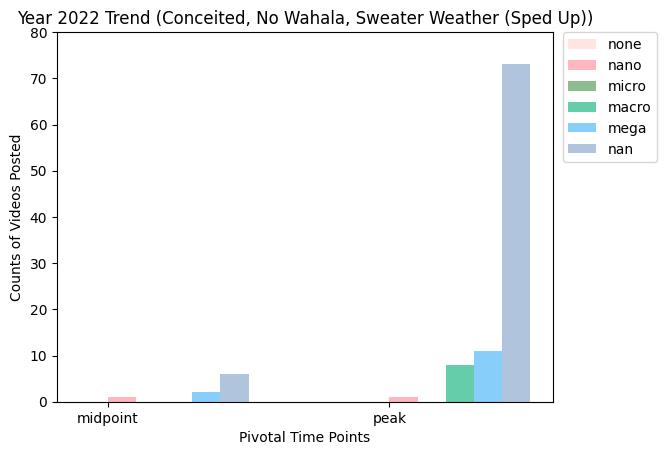

In [90]:
labels = ['midpoint', 'peak']

none = []
nano = []
micro = []
macro = []
mega = []
nan = []

addedList = []

for list1, list2, list3 in zip(conceitedList, NowahalaList, weatherList):
    result = []
    for x, y, z in zip(list1, list2, list3):
        result.append(x + y + z)
    addedList.append(result)



for inner_list1 in addedList:
    none.append(inner_list1[0])
    nano.append(inner_list1[1])
    micro.append(inner_list1[2])
    macro.append(inner_list1[3])
    mega.append(inner_list1[4])
    nan.append(inner_list1[5])


#width
bar_width = 0.1
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

color = ['mistyrose', 'lightpink', 'darkseagreen', 'mediumaquamarine', 'lightskyblue', 'lightsteelblue']

#plot
plt.bar(r1, none, color=color[0], width=bar_width, label='none')
plt.bar(r2, nano, color=color[1], width=bar_width, label='nano')
plt.bar(r3, micro, color=color[2], width=bar_width, label='micro')
plt.bar(r4, macro, color=color[3], width=bar_width, label='macro')
plt.bar(r5, mega, color=color[4], width=bar_width, label='mega')
plt.bar(r6, nan, color=color[5], width=bar_width, label='nan')

#label
plt.xlabel('Pivotal Time Points')
plt.ylabel('Counts of Videos Posted')
plt.title('Year 2022 Trend (Conceited, No Wahala, Sweater Weather (Sped Up))')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.yticks()

#legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim(0, 80)

#plot
plt.show()

In [92]:
print(macro[0] + mega[0])
print(macro[0])
print(mega[0])
# 2 mega

print(none[1] + nano[1]+ micro[1] + macro[1] + mega[1] + nan[1])
#93 authors

2
0
2
93


### Analysis for other songs that don't have the original video labeled

year 2023

In [93]:
videos2023 = ['dropittothefloor.csv', 'itgirl.csv', 'mwahmwah.csv', 'thisyear.csv', 'watertyla.csv']
df2023 = pd.DataFrame()


subset_df2023 = df[(df['sound'] == 'dropittothefloor') | (df['sound'] == 'itgirl')  | (df['sound'] == 'thisyear') | (df['sound'] == 'mwahmwah') | (df['sound'] == 'watertyla')]
subset_df2023['video_playcount_int'] = pd.to_numeric(subset_df2023['video_playcount'], errors='coerce')

df2023 = subset_df2023[(pd.notna(subset_df2023['video_playcount_int'])) & (subset_df2023['video_playcount_int'] > 100000)]

#date format so that only the year, month, and day is shown
editedDateFormat = []

#extract and add a new column
for row in df2023['video_timestamp_new']:
    rowdate = str(row)[0:10]
    rowdatefinal = pd.to_datetime(rowdate, errors='coerce')
    editedDateFormat.append(rowdatefinal)
    

df2023['video_timeNew'] = editedDateFormat

/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_38992/207064779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df2023['video_playcount_int'] = pd.to_numeric(subset_df2023['video_playcount'], errors='coerce')
/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_38992/207064779.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['video_timeNew'] = editedDateFormat


In [94]:
itgirlDF = df2023[df2023['sound']=='itgirl']
thisyearDF = df2023[df2023['sound']=='thisyear']
waterDF = df2023[df2023['sound']=='watertyla']

In [95]:
itgirlmaxdate = max(Counter(itgirlDF['video_timeNew']), key = Counter(itgirlDF['video_timeNew']).get)
stringdateItgirl = str(itgirlmaxdate)[0:10]
itgirlmaxdateConverted = datetime.strptime(stringdateItgirl, '%Y-%m-%d')
itgirldFinalDate = itgirlmaxdateConverted.date()

itgirlcounter = (Counter(itgirlDF['video_timeNew']))
itgirlmaxvideoValue = itgirlcounter[itgirlmaxdate]
print(itgirldFinalDate)
print(itgirlmaxvideoValue)


itgirlPeak = datetime.strptime('2023-10-21', '%Y-%m-%d')
itgirlPeakSubset = itgirlDF[itgirlDF['video_timeNew'] == itgirlPeak]
#63 videos posted on the peak

itgirlInfluencerPEAK = []
itgirlFollowerCountPEAK = []

for followercount in itgirlPeakSubset['author_followercount']:
    itgirlFollowerCountPEAK.append(followercount)
    itgirlInfluencerPEAK.append(influencer_type(followercount))

print(itgirlFollowerCountPEAK)
counterItgirlPeak = Counter(itgirlInfluencerPEAK)
print(counterItgirlPeak)

2023-10-21
63
[326900.0, 21200.0, 254100.0, 254100.0, 43600.0, 576.0, 22700.0, 3100000.0, 2900000.0, 1966.0, nan, 6029.0, 188000.0, 863.0, 570600.0, 6200000.0, 568900.0, 540700.0, 91200.0, 9967.0, 63000.0, 4209.0, 15100.0, 1473.0, 2000000.0, 451400.0, 608500.0, 3100000.0, 40200.0, 101100.0, 784900.0, 1200000.0, 1800000.0, 24200.0, 847400.0, 11700.0, 486400.0, 32700.0, 3819.0, 72500.0, 764900.0, 4297.0, 215700.0, 5090.0, 1107.0, 10100000.0, 440100.0, 1918.0, 519.0, 1200000.0, 339.0, 27500.0, 2300000.0, 553.0, 612800.0, 22900.0, 261000.0, 976800.0, 3500000.0, 88500.0, 1449.0, 10400000.0, 1300000.0]
Counter({'macro': 19, 'micro': 14, 'mega': 13, 'nano': 11, 'none': 5, 'NaN': 1})


In [96]:
thisyearmaxdate = max(Counter(thisyearDF['video_timeNew']), key = Counter(thisyearDF['video_timeNew']).get)
stringdateThisyear = str(thisyearmaxdate)[0:10]
thisyearmaxdateConverted = datetime.strptime(stringdateThisyear, '%Y-%m-%d')
thisyearFinalDate = thisyearmaxdateConverted.date()

thisyearcounter = (Counter(thisyearDF['video_timeNew']))
thisyearmaxvideoValue = thisyearcounter[thisyearmaxdate]
print(thisyearFinalDate)
print(thisyearmaxvideoValue)


thisyearPeak = datetime.strptime('2023-05-31', '%Y-%m-%d')
thisyearPeakSubset = thisyearDF[thisyearDF['video_timeNew'] == thisyearPeak]
#27 videos posted on the peak

thisyearInfluencerPEAK = []
thisyearFollowerCountPEAK = []

for followercount in thisyearPeakSubset['author_followercount']:
    thisyearFollowerCountPEAK.append(followercount)
    thisyearInfluencerPEAK.append(influencer_type(followercount))

print(thisyearFollowerCountPEAK)
counterThisyearPeak = Counter(thisyearInfluencerPEAK)
print(counterThisyearPeak)

2023-05-31
27
[299300.0, 4300000.0, 14200.0, 2100000.0, 5000000.0, 4000000.0, 788600.0, 3092.0, 191200.0, 11200000.0, 37500000.0, 178300.0, 198000.0, 4300000.0, 14200000.0, 66300.0, 12700.0, 1100000.0, 1200000.0, 815.0, 481000.0, 124200.0, 7700000.0, 319600.0, 50700.0, 6400000.0, 3953.0]
Counter({'mega': 12, 'macro': 8, 'micro': 4, 'nano': 2, 'none': 1})


In [97]:
watermaxdate = max(Counter(waterDF['video_timeNew']), key = Counter(waterDF['video_timeNew']).get)
stringdateWater = str(watermaxdate)[0:10]
watermaxdateConverted = datetime.strptime(stringdateWater, '%Y-%m-%d')
waterFinalDate = watermaxdateConverted.date()

watercounter = (Counter(waterDF['video_timeNew']))
watermaxvideoValue = watercounter[watermaxdate]
print(waterFinalDate)
print(watermaxvideoValue)


waterPeak = datetime.strptime('2023-10-25', '%Y-%m-%d')
waterPeakSubset = waterDF[waterDF['video_timeNew'] == waterPeak]
#45 videos posted on the peak

waterInfluencerPEAK = []
waterFollowerCountPEAK = []

for followercount in waterPeakSubset['author_followercount']:
    waterFollowerCountPEAK.append(followercount)
    waterInfluencerPEAK.append(influencer_type(followercount))

print(waterFollowerCountPEAK)
counterWaterPeak = Counter(waterInfluencerPEAK)
print(counterWaterPeak)

2023-10-25
45
[5577.0, 1700000.0, 28700.0, 116600.0, 29800.0, 2300000.0, 473800.0, 3500000.0, 391600.0, 7700000.0, 20000000.0, 1300000.0, 764.0, 1611.0, 3400000.0, 4900000.0, 2100000.0, 4328.0, 11300000.0, 11300000.0, 126200.0, 2700000.0, 3309.0, 111500.0, 6181.0, 409600.0, 11200.0, 3900000.0, 225100.0, 231.0, 3125.0, 164200.0, 68400.0, 278600.0, 3825.0, 3825.0, 33300.0, 199300.0, 349.0, 19500000.0, 93300.0, 14800.0, 1800000.0, 8142.0, 45200.0]
Counter({'mega': 15, 'macro': 10, 'nano': 9, 'micro': 8, 'none': 3})


In [98]:
itgirlDay1 = datetime.strptime('2023-09-30', '%Y-%m-%d')
thisyearDay1 = datetime.strptime('2023-03-05', '%Y-%m-%d')
waterDay1 = datetime.strptime('2023-08-31', '%Y-%m-%d')


itgirl_middate = itgirlDay1.date() + (itgirldFinalDate - itgirlDay1.date()) / 2

thisyear_middate = thisyearDay1.date() + (thisyearFinalDate - thisyearDay1.date()) / 2

water_middate = waterDay1.date() + (waterFinalDate - waterDay1.date()) / 2


print(itgirl_middate)
print(thisyear_middate)
print(water_middate)


2023-10-10
2023-04-17
2023-09-27


In [99]:
itgirlMiddleDate = datetime.strptime('2023-10-10', '%Y-%m-%d')
itgirlMidSubset = itgirlDF[itgirlDF['video_timeNew']==itgirlMiddleDate]
print(itgirlMidSubset)
#36 videos

itgirlInfluencerMID = []
itgirlFollowerCountMID = []

for followercount in itgirlMidSubset['author_followercount']:
    itgirlFollowerCountMID.append(followercount)
    itgirlInfluencerMID.append(influencer_type(followercount))

print(itgirlFollowerCountMID)
counterItgirlMiddle = Counter(itgirlInfluencerMID)
print(counterItgirlMiddle)

        sound  year             video_id      video_timestamp video_duration  \
1865   itgirl  2023  7288444114658479402  2023-10-10T17:25:50           59.0   
2138   itgirl  2023  7288350810746932522  2023-10-10T11:23:41           28.0   
2737   itgirl  2023  7288495712701041951  2023-10-10T20:45:58            9.0   
2939   itgirl  2023  7288380797986426114  2023-10-10T13:20:01           10.0   
3824   itgirl  2023  7288268643220147462  2023-10-10T06:04:42            9.0   
5543   itgirl  2023  7288313870194593057  2023-10-10T09:00:15           11.0   
5838   itgirl  2023  7288327664568405281  2023-10-10T09:53:47           30.0   
7385   itgirl  2023  7288308253815999774  2023-10-10T08:38:32           14.0   
8549   itgirl  2023  7288272263638469918  2023-10-10T06:18:57           23.0   
8657   itgirl  2023  7288359356008025377  2023-10-10T11:56:46           18.0   
9084   itgirl  2023  7288185716067110174  2023-10-10T00:43:02           15.0   
10468  itgirl  2023  7288543354193825055

In [100]:
thisyearMiddleDate = datetime.strptime('2023-04-17', '%Y-%m-%d')
thisyearMidSubset = thisyearDF[thisyearDF['video_timeNew']==thisyearMiddleDate]
print(thisyearMidSubset)
# 6 videos

thisyearInfluencerMID = []
thisyearFollowerCountMID = []

for followercount in thisyearMidSubset['author_followercount']:
    thisyearFollowerCountMID.append(followercount)
    thisyearInfluencerMID.append(influencer_type(followercount))

print(thisyearFollowerCountMID)
counterThisyearMiddle = Counter(thisyearInfluencerMID)
print(counterThisyearMiddle)


          sound  year             video_id      video_timestamp  \
2383   thisyear  2023  7223097871774649606  2023-04-17T15:08:50   
12750  thisyear  2023  7223061534677765382  2023-04-17T12:47:48   
16203  thisyear  2023  7222997522728373510  2023-04-17T08:39:25   
16924  thisyear  2023  7223078702479838491  2023-04-17T13:54:33   
18978  thisyear  2023  7223128303186578690  2023-04-17T17:07:03   
26054  thisyear  2023  7223091414450588933  2023-04-17T14:43:46   

      video_duration video_likecount video_commentcount video_sharecount  \
2383            10.0        372200.0             1215.0          31900.0   
12750           23.0         63000.0              536.0          11800.0   
16203           15.0       1600000.0             3421.0          16900.0   
16924           15.0         64700.0              410.0           1057.0   
18978           15.0         42600.0              501.0            386.0   
26054           15.0         25700.0              253.0            316.0  

In [101]:
waterMiddleDate = datetime.strptime('2023-09-27', '%Y-%m-%d')
waterMidSubset = waterDF[waterDF['video_timeNew']==waterMiddleDate]
print(waterMidSubset)
# 30 videos

waterInfluencerMID = []
waterFollowerCountMID = []

for followercount in waterMidSubset['author_followercount']:
    waterFollowerCountMID.append(followercount)
    waterInfluencerMID.append(influencer_type(followercount))

print(waterFollowerCountMID)
counterWaterrMiddle = Counter(waterInfluencerMID)
print(counterWaterrMiddle)

           sound  year             video_id      video_timestamp  \
2140   watertyla  2023  7283526428786773290  2023-09-27T11:22:38   
2533   watertyla  2023  7283549806004292897  2023-09-27T12:53:13   
3438   watertyla  2023  7283664801451019525  2023-09-27T20:19:28   
3557   watertyla  2023  7283682529335463198  2023-09-27T21:28:23   
4457   watertyla  2023  7283507146975759649  2023-09-27T10:07:44   
4573   watertyla  2023  7283622293429882117  2023-09-27T17:34:32   
5151   watertyla  2023  7283666579211160878  2023-09-27T20:26:28   
8090   watertyla  2023  7283387983992982789  2023-09-27T02:25:16   
9308   watertyla  2023  7283682924904434949  2023-09-27T21:29:51   
9850   watertyla  2023  7283666298372902190  2023-09-27T20:25:20   
12412  watertyla  2023  7283590113009978630  2023-09-27T15:29:39   
13403  watertyla  2023  7283516935952993542  2023-09-27T10:45:39   
13587  watertyla  2023  7283382911024368897  2023-09-27T02:05:37   
14155  watertyla  2023  7283693925527768350  202

In [102]:
AllLists2023 = [counterDropMiddle, counterDropPeak,
                counterItgirlMiddle, counterItgirlPeak, 
                counterMwahMiddle, counterMwahPeak,
                counterThisyearMiddle, counterThisyearPeak, 
                counterWaterrMiddle, counterWaterPeak]

CounterList2023 = []
for list in AllLists2023:
    CounterList2023.append(convertToList(list))

dropListNew = CounterList2023[0:2]
itgirlList = CounterList2023[2:4]
mwahListNew = CounterList2023[4: 6]
thisyearList = CounterList2023[6: 8]
waterList = CounterList2023[8: 10]

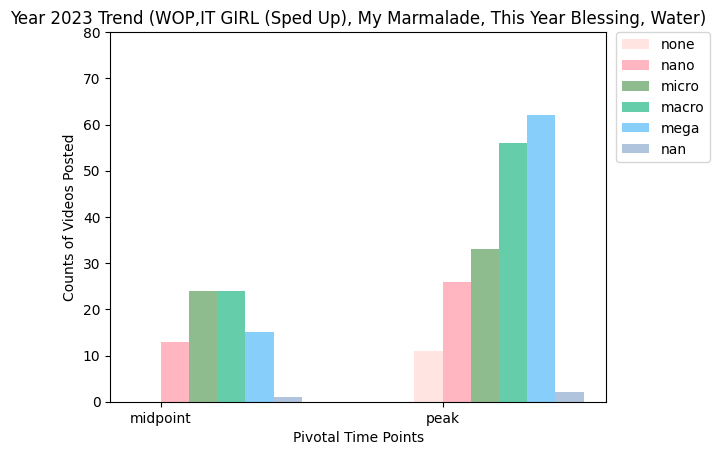

In [103]:
labels = ['midpoint', 'peak']

none = []
nano = []
micro = []
macro = []
mega = []
nan = []


addedList = []

for list1, list2, list3, list4, list5 in zip(dropListNew, itgirlList, mwahListNew, thisyearList, waterList):
    result = []
    for x, y, z, w, k in zip(list1, list2, list3, list4, list5):
        result.append(x + y + z + w + k)
    addedList.append(result)

for inner_list1 in addedList:
    none.append(inner_list1[0])
    nano.append(inner_list1[1])
    micro.append(inner_list1[2])
    macro.append(inner_list1[3])
    mega.append(inner_list1[4])
    nan.append(inner_list1[5])


#width
bar_width = 0.1
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

color = ['mistyrose', 'lightpink', 'darkseagreen', 'mediumaquamarine', 'lightskyblue', 'lightsteelblue']

#plot
plt.bar(r1, none, color=color[0], width=bar_width, label='none')
plt.bar(r2, nano, color=color[1], width=bar_width, label='nano')
plt.bar(r3, micro, color=color[2], width=bar_width, label='micro')
plt.bar(r4, macro, color=color[3], width=bar_width, label='macro')
plt.bar(r5, mega, color=color[4], width=bar_width, label='mega')
plt.bar(r6, nan, color=color[5], width=bar_width, label='nan')

#labels
plt.xlabel('Pivotal Time Points')
plt.ylabel('Counts of Videos Posted')
plt.title('Year 2023 Trend (WOP,IT GIRL (Sped Up), My Marmalade, This Year Blessing, Water)')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.yticks()

#legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim(0, 80)

#plot
plt.show()

In [104]:
print(macro[0] + mega[0])
print(macro[0]) #24
print(mega[0]) #15
#total 39

print(none[1] + nano[1]+ micro[1] + macro[1] + mega[1] + nan[1])
#total 190

39
24
15
190


### Analysis for other songs that don't have the original video labeled

year 2024

In [105]:
videos2024 = ['flomilli.csv', 'glo.csv', 'tyla.csv', 'wannabe.csv']
df2024 = pd.DataFrame()


subset_df2024 = df[(df['sound'] == 'flomilli') | (df['sound'] == 'glo')  | (df['sound'] == 'tyla') | (df['sound'] == 'wannabe')]
subset_df2024['video_playcount_int'] = pd.to_numeric(subset_df2024['video_playcount'], errors='coerce')

df2024 = subset_df2024[(pd.notna(subset_df2024['video_playcount_int'])) & (subset_df2024['video_playcount_int'] > 100000)]


#date format so that only the year, month, and day is shown
editedDateFormat = []

# extract and add a new column
for row in df2024['video_timestamp_new']:
    rowdate = str(row)[0:10]
    rowdatefinal = pd.to_datetime(rowdate, errors='coerce')
    editedDateFormat.append(rowdatefinal)
    

df2024['video_timeNew'] = editedDateFormat

/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_38992/2230187929.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df2024['video_playcount_int'] = pd.to_numeric(subset_df2024['video_playcount'], errors='coerce')
/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_38992/2230187929.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2024['video_timeNew'] = editedDateFormat


In [106]:
floDF = df2024[df2024['sound']=='flomilli']
gloDF = df2024[df2024['sound']=='glo']
tylaDF = df2024[df2024['sound']=='tyla']
wannabeDF = df2024[df2024['sound']=='wannabe']

In [107]:
flomaxdate = max(Counter(floDF['video_timeNew']), key = Counter(floDF['video_timeNew']).get)
stringdateFlo = str(flomaxdate)[0:10]
flomaxdateConverted = datetime.strptime(stringdateFlo, '%Y-%m-%d')
floFinalDate = flomaxdateConverted.date()

flocounter = (Counter(floDF['video_timeNew']))
flomaxvideoValue = flocounter[flomaxdate]
print(floFinalDate)
print(flomaxvideoValue)


floPeak = datetime.strptime('2024-01-13', '%Y-%m-%d')
floPeakSubset = floDF[floDF['video_timeNew'] == floPeak]
#44 videos posted on the peak

floInfluencerPEAK = []
floFollowerCountPEAK = []

for followercount in floPeakSubset['author_followercount']:
    floFollowerCountPEAK.append(followercount)
    floInfluencerPEAK.append(influencer_type(followercount))

print(floFollowerCountPEAK)
counterFloPeak = Counter(floInfluencerPEAK)
print(counterFloPeak)

2024-01-13
44
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1600000.0, nan, nan, 4000000.0, nan, 56300.0, nan, nan, nan, 894600.0, nan, nan, nan, nan, nan, 1800000.0, nan, nan, nan, nan, nan, nan, nan]
Counter({'NaN': 39, 'mega': 3, 'micro': 1, 'macro': 1})


In [108]:
glomaxdate = max(Counter(gloDF['video_timeNew']), key = Counter(gloDF['video_timeNew']).get)
stringdateGlo = str(glomaxdate)[0:10]
glomaxdateConverted = datetime.strptime(stringdateGlo, '%Y-%m-%d')
gloFinalDate = glomaxdateConverted.date()

glocounter = (Counter(gloDF['video_timeNew']))
glomaxvideoValue = glocounter[glomaxdate]
print(gloFinalDate)
print(glomaxvideoValue)


gloPeak = datetime.strptime('2024-04-20', '%Y-%m-%d')
gloPeakSubset = gloDF[gloDF['video_timeNew'] == gloPeak]
#8 videos posted on the peak

gloInfluencerPEAK = []
gloFollowerCountPEAK = []

for followercount in gloPeakSubset['author_followercount']:
    gloFollowerCountPEAK.append(followercount)
    gloInfluencerPEAK.append(influencer_type(followercount))

print(gloFollowerCountPEAK)
counterGloPeak = Counter(gloInfluencerPEAK)
print(counterGloPeak)

2024-04-20
8
[670600.0, 4000000.0, 5830.0, 24500.0, 535400.0, 5158.0, nan, 4278.0]
Counter({'nano': 3, 'macro': 2, 'mega': 1, 'micro': 1, 'NaN': 1})


In [109]:
tylamaxdate = max(Counter(tylaDF['video_timeNew']), key = Counter(tylaDF['video_timeNew']).get)
stringdateTyla = str(tylamaxdate)[0:10]
tylamaxdateConverted = datetime.strptime(stringdateTyla, '%Y-%m-%d')
tylaFinalDate = tylamaxdateConverted.date()

tylacounter = (Counter(tylaDF['video_timeNew']))
tylamaxvideoValue = tylacounter[tylamaxdate]
print(tylaFinalDate)
print(tylamaxvideoValue)


tylaPeak = datetime.strptime('2024-04-19', '%Y-%m-%d')
tylaPeakSubset = tylaDF[tylaDF['video_timeNew'] == tylaPeak]
#35 videos posted on the peak

tylaInfluencerPEAK = []
tylaFollowerCountPEAK = []

for followercount in tylaPeakSubset['author_followercount']:
    tylaFollowerCountPEAK.append(followercount)
    tylaInfluencerPEAK.append(influencer_type(followercount))

print(tylaFollowerCountPEAK)
counterTylaPeak = Counter(tylaInfluencerPEAK)
print(counterTylaPeak)

2024-04-19
35
[nan, 10400000.0, nan, 869900.0, nan, nan, 14000000.0, nan, nan, nan, nan, nan, nan, nan, 451400.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 33600000.0, nan, nan, 299000.0, 8300000.0, nan, nan, nan, 697600.0, nan]
Counter({'NaN': 27, 'mega': 4, 'macro': 4})


In [110]:
wannabemaxdate = max(Counter(wannabeDF['video_timeNew']), key = Counter(wannabeDF['video_timeNew']).get)
stringdateWannabe = str(wannabemaxdate)[0:10]
wannabemaxdateConverted = datetime.strptime(stringdateWannabe, '%Y-%m-%d')
wannabeFinalDate = wannabemaxdateConverted.date()

wannabecounter = (Counter(wannabeDF['video_timeNew']))
wannabemaxvideoValue = wannabecounter[wannabemaxdate]
print(wannabeFinalDate)
print(wannabemaxvideoValue)


wannabePeak = datetime.strptime('2024-04-09', '%Y-%m-%d')
wannabePeakSubset = wannabeDF[wannabeDF['video_timeNew'] == wannabePeak]
#24 videos posted on the peak

wannabeInfluencerPEAK = []
wannabeFollowerCountPEAK = []

for followercount in wannabePeakSubset['author_followercount']:
    wannabeFollowerCountPEAK.append(followercount)
    wannabeInfluencerPEAK.append(influencer_type(followercount))

print(wannabeFollowerCountPEAK)
counterWannabePeak = Counter(wannabeInfluencerPEAK)
print(counterWannabePeak)

2024-04-09
24
[10600.0, 197100.0, 122200.0, nan, 169500.0, 2128.0, nan, nan, 2444.0, 42200.0, nan, nan, nan, 61300.0, nan, 3800000.0, 47200.0, 33200.0, nan, nan, 788100.0, 67000.0, 30500.0, 556300.0]
Counter({'NaN': 9, 'micro': 7, 'macro': 5, 'nano': 2, 'mega': 1})


In [111]:
floDay1 = datetime.strptime('2023-12-01', '%Y-%m-%d')
gloDay1 = datetime.strptime('2024-03-13', '%Y-%m-%d')
tylaDay1 = datetime.strptime('2023-03-12', '%Y-%m-%d')
wannabeDay1 = datetime.strptime('2024-03-25', '%Y-%m-%d')

flo_middate = floDay1.date() + (floFinalDate - floDay1.date()) / 2

glo_middate = gloDay1.date() + (gloFinalDate - gloDay1.date()) / 2

tyla_middate = tylaDay1.date() + (tylaFinalDate - tylaDay1.date()) / 2

wannabe_middate = wannabeDay1.date() + (wannabeFinalDate - wannabeDay1.date()) / 2


print(flo_middate)
print(glo_middate)
print(tyla_middate)
print(wannabe_middate)


2023-12-22
2024-04-01
2023-09-30
2024-04-01


In [112]:
florMiddleDate = datetime.strptime('2023-12-22', '%Y-%m-%d')
floMidSubset = floDF[floDF['video_timeNew']==florMiddleDate]
print(floMidSubset)
#3 videos

floInfluencerMID = []
floFollowerCountMID = []

for followercount in floMidSubset['author_followercount']:
    floFollowerCountMID.append(followercount)
    floInfluencerMID.append(influencer_type(followercount))

print(floFollowerCountMID)
counterFloMiddle = Counter(floInfluencerMID)
print(counterFloMiddle)

          sound  year             video_id      video_timestamp  \
8175   flomilli  2024  7315616568044457262  2023-12-22T21:48:51   
9423   flomilli  2024  7315317055245339910  2023-12-22T02:26:22   
13967  flomilli  2024  7315530420525780267  2023-12-22T16:14:25   

      video_duration video_likecount video_commentcount video_sharecount  \
8175            62.0         75500.0              411.0            581.0   
9423            13.0         77800.0             1116.0           1045.0   
13967           15.0         71300.0              436.0            359.0   

      video_playcount                                  video_description  ...  \
8175         262800.0  the way that he had no explanation does it for...  ...   
9423         320200.0  #gojosatoru #blowthisup #jjk #fyp #gojo #jjked...  ...   
13967        396100.0  He never wanna lose me 🤭🤭 #kobeandlex #goals #...  ...   

      author_name author_bio author_followercount author_likecounts  \
8175          NaN        NaN  

In [113]:
gloMiddleDate = datetime.strptime('2024-04-01', '%Y-%m-%d')
gloMidSubset = gloDF[gloDF['video_timeNew']==gloMiddleDate]
print(gloMidSubset)
#only one video

gloInfluencerMID = []
gloFollowerCountMID = []

for followercount in gloMidSubset['author_followercount']:
    gloFollowerCountMID.append(followercount)
    gloInfluencerMID.append(influencer_type(followercount))

print(gloFollowerCountMID)
counterGloMiddle = Counter(gloInfluencerMID)
print(counterGloMiddle)
#mega

      sound  year             video_id      video_timestamp video_duration  \
26687   glo  2024  7353032736682134827  2024-04-01T18:42:37           12.0   

      video_likecount video_commentcount video_sharecount video_playcount  \
26687        500000.0             2115.0           4239.0       4100000.0   

                                       video_description  ...  author_name  \
26687  Iheart music awards here we come!! How many yo...  ...  Bunnie Xo 🪄   

                                              author_bio author_followercount  \
26687  🧚‍♂️ Fairy Godmother 🪄 Trailerpark Barbara Wal...            5500000.0   

      author_likecounts  video_stickers  video_is_ad video_locationcreated  \
26687       172000000.0             NaN        False                    US   

       video_timestamp_new video_playcount_int video_timeNew  
26687  2024-04-01 18:42:37           4100000.0    2024-04-01  

[1 rows x 22 columns]
[5500000.0]
Counter({'mega': 1})


In [114]:
tylaMiddleDate = datetime.strptime('2023-09-18', '%Y-%m-%d')
tylaMidSubset = tylaDF[tylaDF['video_timeNew']==tylaMiddleDate]
print(tylaMidSubset)
#only one video

tylaInfluencerMID = []
tylaFollowerCountMID = []

for followercount in tylaMidSubset['author_followercount']:
    tylaFollowerCountMID.append(followercount)
    tylaInfluencerMID.append(influencer_type(followercount))

print(tylaFollowerCountMID)
counterTylaMiddle = Counter(tylaInfluencerMID)
print(counterTylaMiddle)
#NaN

      sound  year             video_id      video_timestamp video_duration  \
23073  tyla  2024  7280347146669296926  2023-09-18T21:45:26           25.0   

      video_likecount video_commentcount video_sharecount video_playcount  \
23073         16200.0               44.0            356.0        196500.0   

                                       video_description  ... author_name  \
23073  💌: Another day another glute workout! Lmk if y...  ...         NaN   

      author_bio author_followercount author_likecounts  video_stickers  \
23073        NaN                  NaN               NaN             NaN   

       video_is_ad video_locationcreated  video_timestamp_new  \
23073        False                    US  2023-09-18 21:45:26   

      video_playcount_int video_timeNew  
23073            196500.0    2023-09-18  

[1 rows x 22 columns]
[nan]
Counter({'NaN': 1})


In [115]:
wannabeMiddleDate = datetime.strptime('2024-04-18', '%Y-%m-%d')
wannabeMidSubset = wannabeDF[wannabeDF['video_timeNew']==wannabeMiddleDate]
print(wannabeMidSubset)
# 2 videos

wannabeInfluencerMID = []
wannabeFollowerCountMID = []

for followercount in wannabeMidSubset['author_followercount']:
    wannabeFollowerCountMID.append(followercount)
    wannabeInfluencerMID.append(influencer_type(followercount))

print(wannabeFollowerCountMID)
counterWannabeMiddle = Counter(wannabeInfluencerMID)
print(counterWannabeMiddle)

         sound  year             video_id      video_timestamp video_duration  \
11296  wannabe  2024  7359421881474207018  2024-04-18T23:55:50          190.0   
12903  wannabe  2024  7359384673241369902  2024-04-18T21:31:19           15.0   

      video_likecount video_commentcount video_sharecount video_playcount  \
11296          3943.0               38.0             73.0        209900.0   
12903          9780.0              107.0           1032.0        104000.0   

                                       video_description  ...   author_name  \
11296  #megandglochallenge #gloria #glorilla #meganth...  ...           NaN   
12903                      Replying to @The woodoo bet 👀  ...  Juuicyjordan   

      author_bio author_followercount author_likecounts  video_stickers  \
11296        NaN                  NaN               NaN             NaN   
12903          💜            1000000.0        23300000.0             NaN   

       video_is_ad video_locationcreated  video_timestamp_ne

In [116]:
AllLists2024 = [counterFloMiddle, counterFloPeak,
                counterGloMiddle, counterGloPeak, 
                counterTylaMiddle, counterTylaPeak,
                counterWannabeMiddle, counterWannabePeak]

CounterList2024 = []
for list in AllLists2024:
    CounterList2024.append(convertToList(list))

floList = CounterList2024[0:2]
gloList = CounterList2024[2:4]
tylaList = CounterList2024[4: 6]
wannabeList = CounterList2024[6: 8]

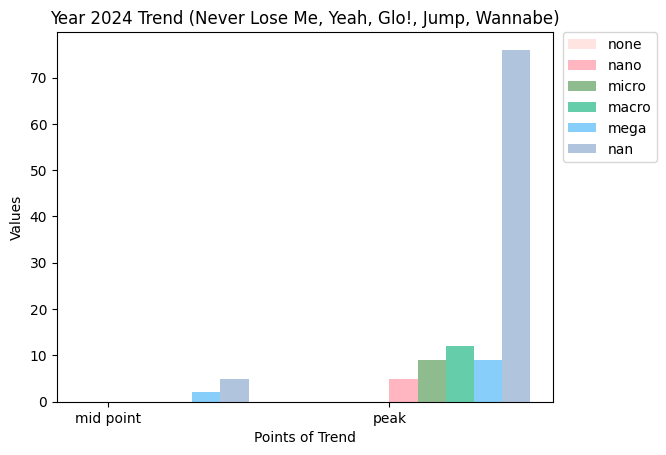

In [117]:
labels = ['mid point', 'peak']

none = []
nano = []
micro = []
macro = []
mega = []
nan = []

result = [[x + y + z + w for x, y, z, w in zip(sublist1, sublist2, sublist3, sublist4)] 
          for sublist1, sublist2, sublist3, sublist4 in zip(floList, gloList, tylaList, wannabeList)]

addedList = []

for list1, list2, list3, list4 in zip(floList, gloList, tylaList, wannabeList):
    result = []
    for x, y, z, w in zip(list1, list2, list3, list4):
        result.append(x + y + z + w)
    addedList.append(result)


for inner_list1 in addedList:
    none.append(inner_list1[0])
    nano.append(inner_list1[1])
    micro.append(inner_list1[2])
    macro.append(inner_list1[3])
    mega.append(inner_list1[4])
    nan.append(inner_list1[5])


#width
bar_width = 0.1
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

color = ['mistyrose', 'lightpink', 'darkseagreen', 'mediumaquamarine', 'lightskyblue', 'lightsteelblue']

#plot
plt.bar(r1, none, color=color[0], width=bar_width, label='none')
plt.bar(r2, nano, color=color[1], width=bar_width, label='nano')
plt.bar(r3, micro, color=color[2], width=bar_width, label='micro')
plt.bar(r4, macro, color=color[3], width=bar_width, label='macro')
plt.bar(r5, mega, color=color[4], width=bar_width, label='mega')
plt.bar(r6, nan, color=color[5], width=bar_width, label='nan')

#label
plt.xlabel('Points of Trend')
plt.ylabel('Values')
plt.title('Year 2024 Trend (Never Lose Me, Yeah, Glo!, Jump, Wannabe)')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.yticks()

#legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


#plot
plt.show()

In [118]:
print(macro[0] + mega[0])
print(macro[0]) #2
print(mega[0]) #2
#total 2

print(none[1] + nano[1]+ micro[1] + macro[1] + mega[1] + nan[1])
#total 111

2
0
2
111
